In [5]:
from Bio import Entrez
import pandas as pd

#dicdtionary to store the counts of papers per year
RNAseq_counts = {}

#read in your email from a file
with open('../../api_keys/ncbi_email.txt', 'r') as file:
    email = file.read().replace('\n', '')

#set up Entrez
Entrez.email = email

#search for papers with RNA-seq in the title or abstract for each year
for i in range(2007,2025,1):
    handle = Entrez.esearch(db='pubmed',term=str(i)+'[dp] AND RNA-seq[TIAB]')
    record = Entrez.read(handle)
    handle.close()
    # we can iterate through the record and only return the 'nucleotide' result
    for row in record:
        if row == 'Count':
            RNAseq_counts[i] = int(record[row])

In [6]:
#convert the dictionary to a pandas dataframe with columns year and paper count
rnaseq_papers_by_year = pd.DataFrame(list(RNAseq_counts.items()), columns=['year', 'paper_count'])

rnaseq_papers_by_year.head()

,year,paper_count
0,2007,0
1,2008,6
2,2009,33
3,2010,156
4,2011,359


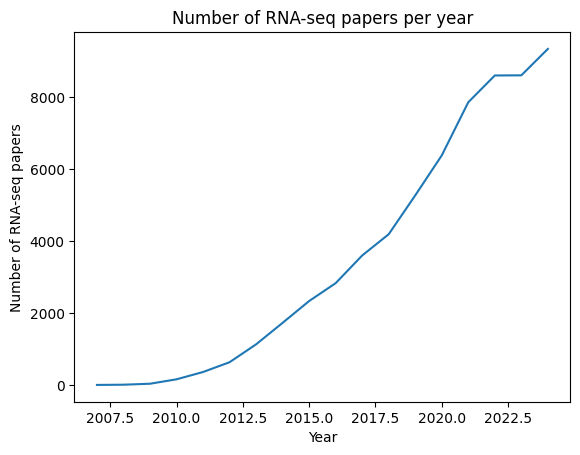

In [7]:
#plot the data as a line plot
import matplotlib.pyplot as plt

plt.plot(rnaseq_papers_by_year['year'], rnaseq_papers_by_year['paper_count'])
plt.xlabel('Year')
plt.ylabel('Number of RNA-seq papers')
plt.title('Number of RNA-seq papers per year')
plt.show()

#EEK!